In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5

In [7]:
from statsmodels.tsa.stattools import adfuller

### The Function adfuller() from Statsmodel.tsa.stattools is used to perform Augmented Dickey-Fuller test, which is a statistical test for stationarity. in  a time-series analysis stationarity is an important property  that indictaes the statistical properties of series (such as mean aand variance) are constatnt over time

In [10]:
air_passenger = pd.read_csv('air_passengers.csv')
air_passenger.head()

,Month,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: >

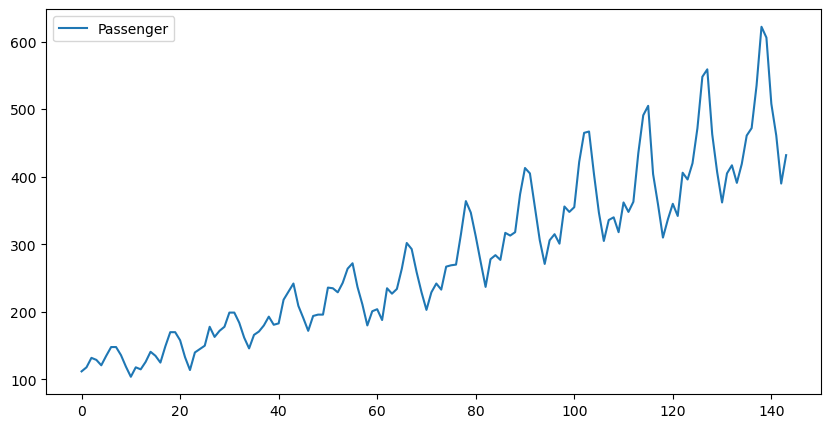

In [11]:
air_passenger.plot()

### adfuller() function take the parameter
1. y = the timeseries data(as a list, numpy array or pandas series)
2. maxlag = the maximum number of lags to use it in the test, default value none
3. regression specifies the form of the deterministic components in the test
4. autolag
5. store
6. regresults


In [12]:
def test_timeseries_stationary(ts):
    ts = ts['Passenger']
    print('Dickey Fuller Test')
    dickey_fuller_test = adfuller(ts, autolag = 'AIC')
    dickey_fuller_output = pd.Series(dickey_fuller_test[0: 4], index = ['test statistic', 'p-value', 'number of lags used', 'observation used'])
    for key, value in dickey_fuller_test[4].items():
        dickey_fuller_output['Critical value (%s)' %key] = value
    print(dickey_fuller_output)

In [13]:
test_timeseries_stationary(air_passenger)

Dickey Fuller Test
test statistic            0.815369
p-value                   0.991880
number of lags used      13.000000
observation used        130.000000
Critical value (1%)      -3.481682
Critical value (5%)      -2.884042
Critical value (10%)     -2.578770
dtype: float64


In [15]:
# Calculating the log value of the air_passenger
air_passenger_log_value = np.log(air_passenger['Passenger'])

In [18]:
air_passenger_log_value.head()

0    4.718499
1    4.770685
2    4.882802
3    4.859812
4    4.795791
Name: Passenger, dtype: float64

<Axes: >

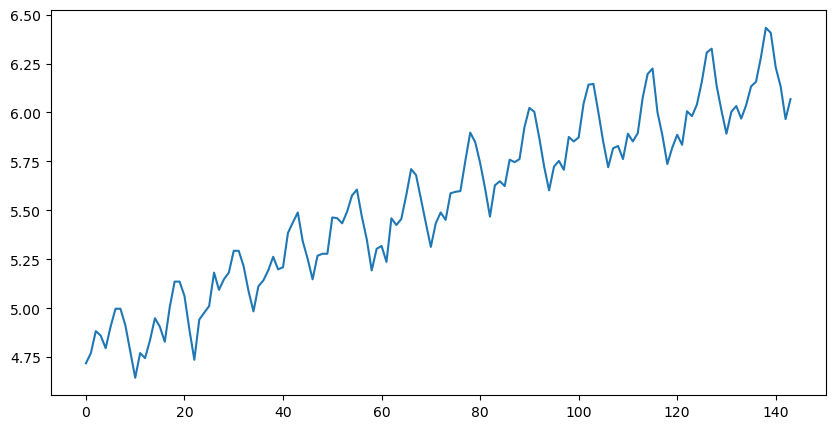

In [17]:
air_passenger_log_value.plot()

In [20]:
air_passenger_log_value_dif = air_passenger_log_value - air_passenger_log_value.shift()

In [21]:
air_passenger_log_value_dif.head()

0         NaN
1    0.052186
2    0.112117
3   -0.022990
4   -0.064022
Name: Passenger, dtype: float64

<Axes: >

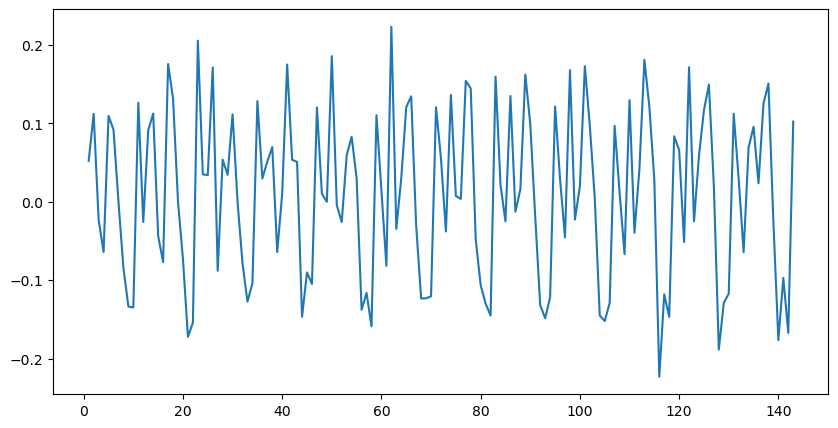

In [22]:
air_passenger_log_value_dif.plot()

### In time series both log() and log.shift() are used to transform or manipulate data but they serve different purposes

1. log() = taking the natural logarithm (log) of time series helps to stabilize the variance espeacially when the data exhibits exponential growth
2. log().shift() = In time series is used to shift the values of the series forward or backward by a specified number of periods.

In [29]:
air_passenger_log_value_dif.dropna(inplace = True)
test_timeseries_stationary(pd.DataFrame(air_passenger_log_value_dif))

Dickey Fuller Test
test statistic           -2.717131
p-value                   0.071121
number of lags used      14.000000
observation used        128.000000
Critical value (1%)      -3.482501
Critical value (5%)      -2.884398
Critical value (10%)     -2.578960
dtype: float64
